# Mortality Analysis of COVID-19

This report was created by Yajian Zhang and Yiran Zhang for the final project of DAMG6105, Spring 2022, NEU. It is guided by Professor Pramod Gupta.

In [60]:
import pandas as pd
import seaborn as sns
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")

## Introduction

As we all know, the COVID-19 has brought huge impacts on global health. Therefore, we choose it as our topic for further analysis. We use data primaily from World Health Orgainzation(WHO) considering the reliability of data.

### Read and examine the dataset

In [61]:
df = pd.read_csv('WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199317 entries, 0 to 199316
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      199317 non-null  datetime64[ns]
 1   Country_code       198476 non-null  object        
 2   Country            199317 non-null  object        
 3   WHO_region         199317 non-null  object        
 4   New_cases          199317 non-null  int64         
 5   Cumulative_cases   199317 non-null  int64         
 6   New_deaths         199317 non-null  int64         
 7   Cumulative_deaths  199317 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 12.2+ MB


There are 199317 entries. However, the 'Country_code' column has 841 null values while the 'Country' column has no null values. After locating the rows with null country_code and examing the dataset, it is found that the Country Namibia has Country_code as 'NA', which is treated as NaN by default. Therefore, we have to take care of this.

In [62]:
df[df.Country_code.isnull()]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
120263,2020-01-03,NaN,Namibia,AFRO,0,0,0,0
120264,2020-01-04,NaN,Namibia,AFRO,0,0,0,0
120265,2020-01-05,NaN,Namibia,AFRO,0,0,0,0
120266,2020-01-06,NaN,Namibia,AFRO,0,0,0,0
120267,2020-01-07,NaN,Namibia,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
121099,2022-04-18,NaN,Namibia,AFRO,16,158102,0,4022
121100,2022-04-19,NaN,Namibia,AFRO,10,158112,0,4022
121101,2022-04-20,NaN,Namibia,AFRO,27,158139,0,4022
121102,2022-04-21,NaN,Namibia,AFRO,0,158139,0,4022


We need to specify the null values, after which the dataset is correct and can be used for analysis.

In [63]:
# No null values are found
df = pd.read_csv('WHO-COVID-19-global-data.csv',keep_default_na=False, na_values=['_'], parse_dates=['Date_reported'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199317 entries, 0 to 199316
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      199317 non-null  datetime64[ns]
 1   Country_code       199317 non-null  object        
 2   Country            199317 non-null  object        
 3   WHO_region         199317 non-null  object        
 4   New_cases          199317 non-null  int64         
 5   Cumulative_cases   199317 non-null  int64         
 6   New_deaths         199317 non-null  int64         
 7   Cumulative_deaths  199317 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 12.2+ MB


### Overview of Covid-19 in all countries over time

In [64]:
confirmed = df.groupby(['Date_reported']).sum().reset_index()
confirmed.info()
confirmed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      841 non-null    datetime64[ns]
 1   New_cases          841 non-null    int64         
 2   Cumulative_cases   841 non-null    int64         
 3   New_deaths         841 non-null    int64         
 4   Cumulative_deaths  841 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 33.0 KB


,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,0,0,0,0
1,2020-01-04,3,3,0,0
2,2020-01-05,0,3,0,0
3,2020-01-06,3,6,0,0
4,2020-01-07,0,6,0,0


COVID-19 has brought huge impact on global health, social and economic. The two figures below show the cumulative cases and cumulative deaths worldwide, it can be told that there are one main sharp increase of new cases, starting from January 2022， which is the due to the Omicorn variant.

The number of deaths keeps growing. Fortunately, the growth rate is slowing down. As we can see from the figure, the curve tends to be flat after Jan 2022.

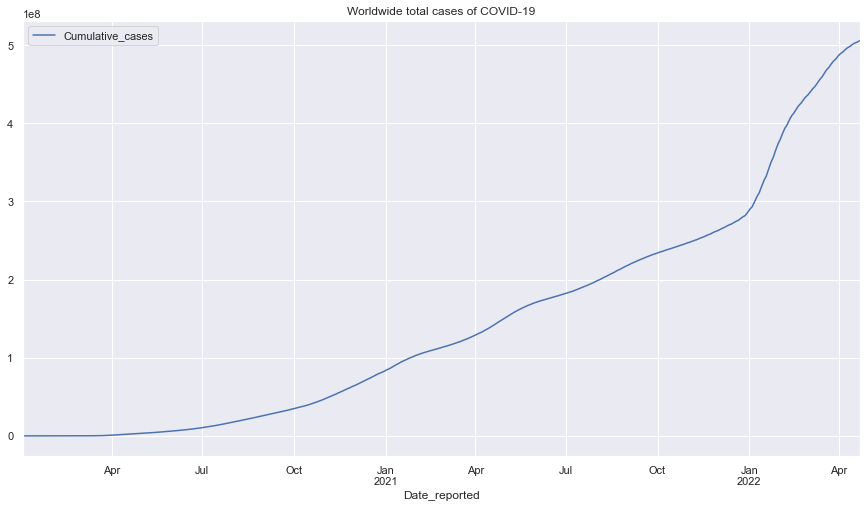

In [65]:
cumulative = confirmed.plot(kind='line', x='Date_reported', y=['Cumulative_cases'], title = 'Worldwide total cases of COVID-19',figsize=(15,8))

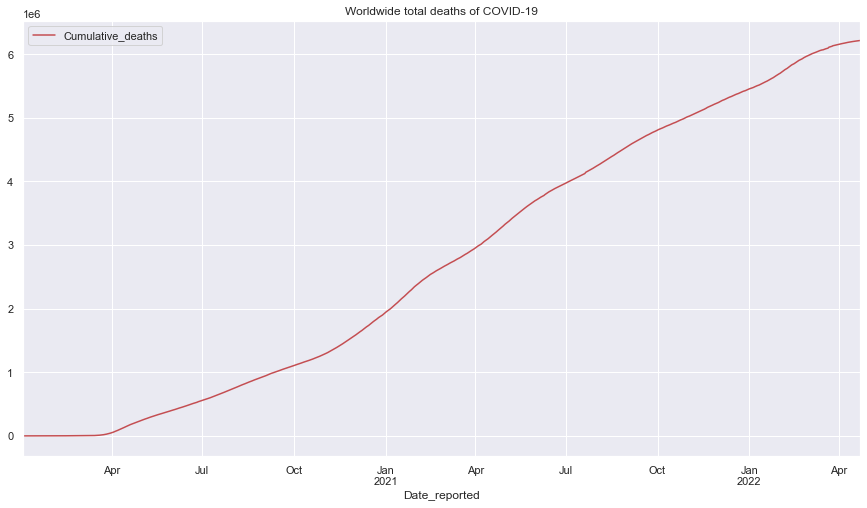

In [66]:
cumulative_death = confirmed.plot(kind='line', x='Date_reported', y=['Cumulative_deaths'], title = 'Worldwide total deaths of COVID-19',figsize=(15,8), color='r')

The below two figures show the daily new cases and deaths. There is a peak around February 2022 because of the Omicorn variant.

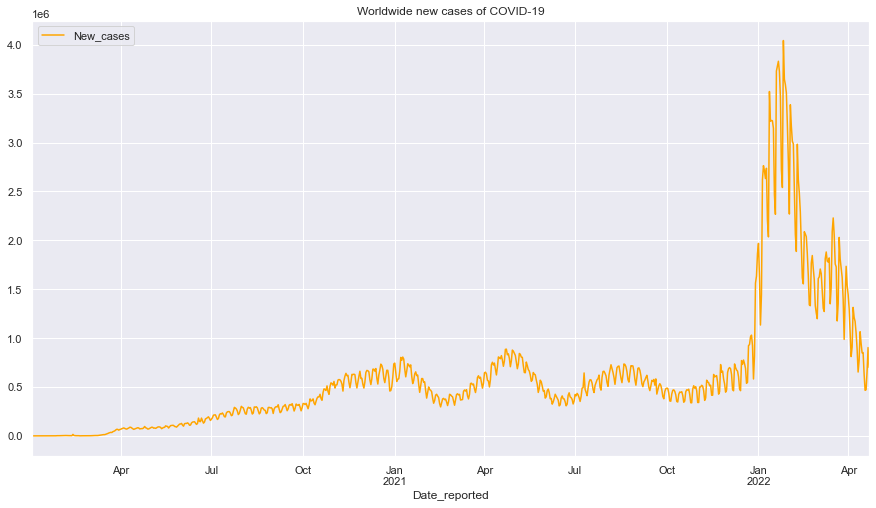

In [67]:
new_cases = confirmed.plot(x='Date_reported', y=['New_cases'], title = 'Worldwide new cases of COVID-19',color='orange', figsize=(15,8))

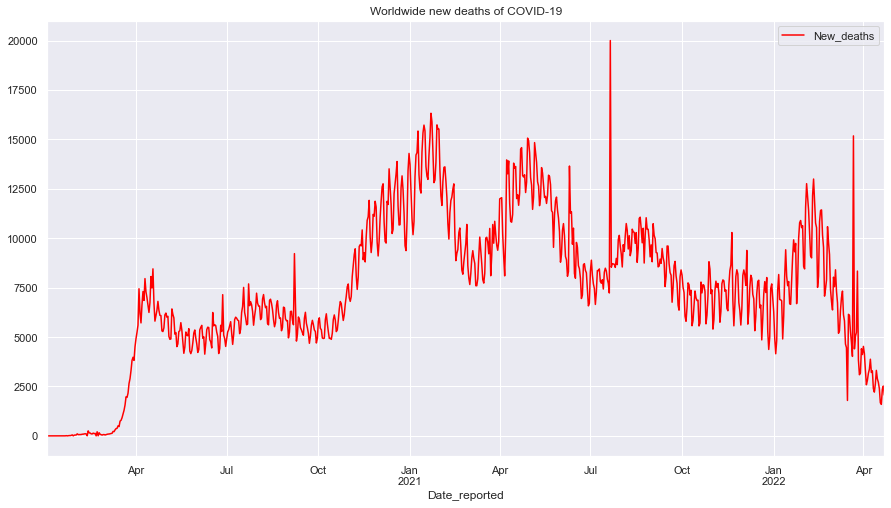

In [68]:
new_deaths = confirmed.plot(x='Date_reported', y=['New_deaths'], title = 'Worldwide new deaths of COVID-19',color='red', figsize=(15,8))


The maxmimu daily new death is 20005, which is reported on 7/21/2021. It is notable that there is a sharp drop in the figure around March 2022. Through data analysis, it it discovered that the US reported a negative number of 2542 at March 16 2022. Through literature review, the negative number comes from data adjustment, the US reported more cases than actual numbers previously.

In [69]:
confirmed['New_cases'].max()

4043451

In [70]:
confirmed['New_deaths'].max()

20005

In [71]:
confirmed[confirmed['New_deaths'] == 20005]

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
565,2021-07-21,516188,191823066,20005,4143398


In [72]:
# trying to find the minimum new_deaths
df['New_deaths'].min()

-2452

In [73]:
# locate the data
df.loc[df['New_deaths'] == -2452]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
190869,2022-03-16,US,United States of America,AMRO,61317,78913604,-2452,961108


<AxesSubplot:title={'center':'Worldwide death rate of COVID-19'}, xlabel='Date_reported'>

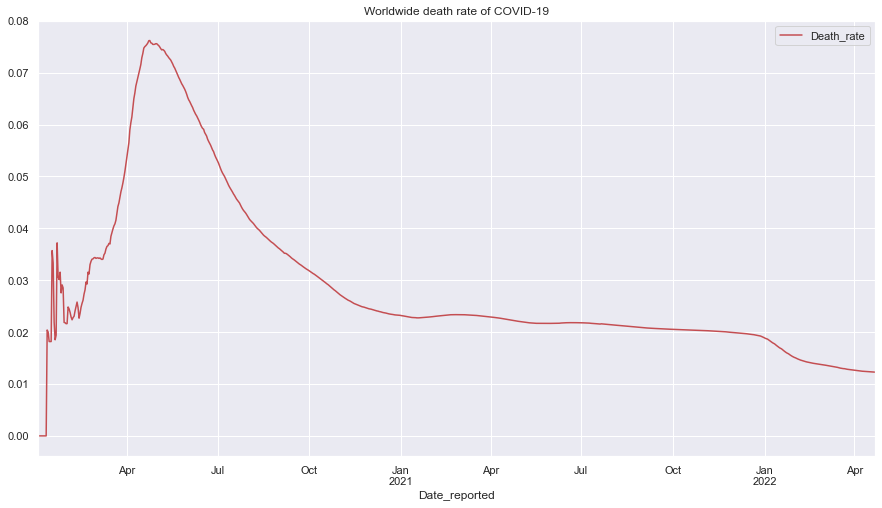

In [74]:
confirmed['Death_rate'] = confirmed['Cumulative_deaths'] / confirmed['Cumulative_cases']
confirmed.tail(100)
confirmed.plot(x='Date_reported', y='Death_rate',color='r',kind='line',figsize=(15,8), title='Worldwide death rate of COVID-19')

To summarize, compared with flu, the mortality rate of covid-19 is higher.But the new cases and death rate keep dropping, which is a good news.

### Research question and scope of analysis

Under such background, we decide to explore what factors that can affect the death rate of COVID-19. For scope, we reply on existing data. After that, we adopt descriptive and exploratory analysis. First, we try to describe the data and then we dig deeper into the data and try to find whether there is any relationship between them and the death rate.

## Analysis

### Analysis among regions

We start our analysis from the regional level, Based on the classification of the WHO, there are seven regions. As the pie shows, the European region has the highest cases. Not considering the Other region, which has zero portion, Africa region has the fewest cases, which takes only 1.7%.

In [75]:
latest_df = df[df['Date_reported'] == '2022-04-22']
latest_df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
195952,2022-04-22,VN,Viet Nam,WPRO,30574,10533164,9,42991
196793,2022-04-22,WF,Wallis and Futuna,WPRO,0,454,0,7
197634,2022-04-22,YE,Yemen,EMRO,0,11818,0,2148
198475,2022-04-22,ZM,Zambia,AFRO,344,318984,1,3974
199316,2022-04-22,ZW,Zimbabwe,AFRO,0,247383,0,5467


In [76]:

region_confirmed = latest_df.groupby('WHO_region').sum().reset_index()
region_confirmed['Death_rate'] = region_confirmed['Cumulative_deaths']/region_confirmed['Cumulative_cases']
region_confirmed.head(7)

,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate
0,AFRO,18730,8711054,80,171538,0.019692
1,AMRO,58414,152265980,455,2717108,0.017844
2,EMRO,645,21681983,2,341987,0.015773
3,EURO,358511,212388135,905,1977835,0.009312
4,Other,0,764,0,13,0.017016
5,SEARO,24564,57688287,183,783108,0.013575
6,WPRO,239233,53081750,438,222287,0.004188


Text(0.5, 1.0, 'Total COVID-19 cases of seven WHO regions')

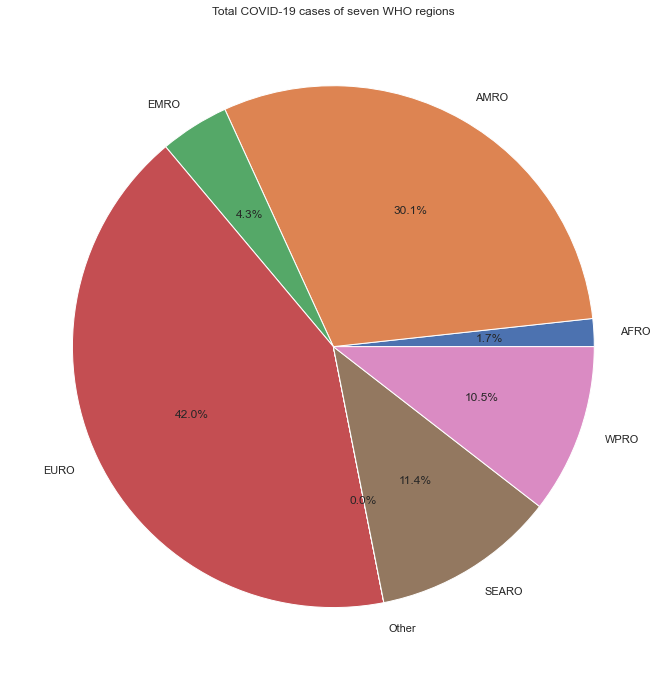

In [77]:

plt.figure(figsize=(12, 12))
plt.pie(region_confirmed.Cumulative_cases, labels=region_confirmed.WHO_region.unique(),autopct="%1.1f%%")
plt.title('Total COVID-19 cases of seven WHO regions')


After calculating the death rate, it is found that although Africa region has the fewest cases, it has the highest death rate. The Western Pacific region has a lowest death rate, which includes countries such as China and Australia.

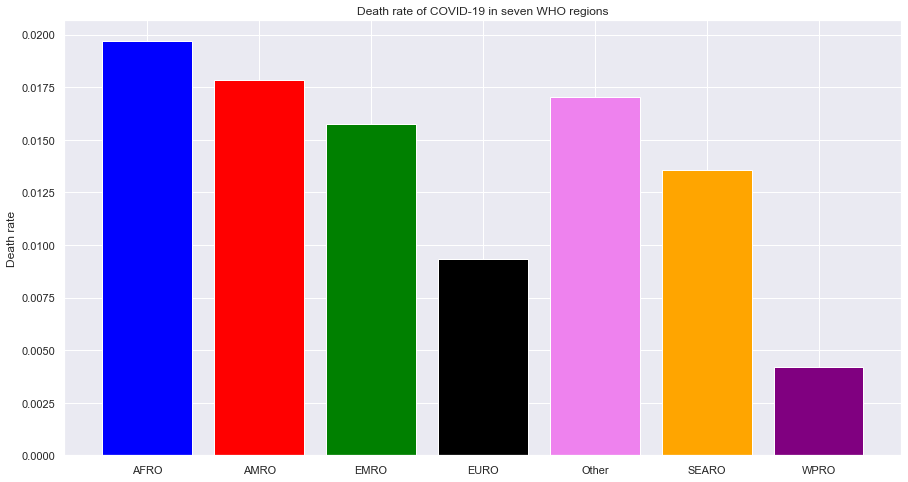

In [78]:
colors = ['blue', 'red','green', 'black', 'violet', 'orange', 'purple']
plt.figure(figsize=(15, 8))
plt.bar(region_confirmed.WHO_region.unique(), region_confirmed.Death_rate, color = colors)
plt.title('Death rate of COVID-19 in seven WHO regions')
plt.ylabel('Death rate')
plt.grid(True)

### Top 10 cuntries in tems of cumulative cases and death rate

We choose 10 countries of with highest death rate and 10 countries with most cumulative cases for better analysis. First, we create the country dataframe, grouping by 'Country'.

In [79]:
by_country = latest_df.copy()
by_country['Death_rate'] = latest_df['Cumulative_deaths']/latest_df['Cumulative_cases']
by_country.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate
840,2022-04-22,AF,Afghanistan,EMRO,56,178611,0,7680,0.042998
1681,2022-04-22,AL,Albania,EURO,79,274685,0,3496,0.012727
2522,2022-04-22,DZ,Algeria,AFRO,8,265754,0,6874,0.025866
3363,2022-04-22,AS,American Samoa,WPRO,45,5708,1,22,0.003854
4204,2022-04-22,AD,Andorra,EURO,0,41013,0,153,0.003731


Next, we sort the dataframework based on death rate and check the head and tail of it. 

In [80]:
sorted_by_country = by_country.sort_values(by=['Death_rate'], ascending=False)

In [81]:
sorted_by_country.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate
197634,2022-04-22,YE,Yemen,EMRO,0,11818,0,2148,0.181757
172404,2022-04-22,SD,Sudan,EMRO,9,62093,1,4930,0.079397
138764,2022-04-22,PE,Peru,AMRO,730,3557869,28,212704,0.059784
113534,2022-04-22,MX,Mexico,AMRO,0,5730560,0,324004,0.056540
175768,2022-04-22,SY,Syrian Arab Republic,EMRO,0,55785,0,3150,0.056467
168199,2022-04-22,SO,Somalia,EMRO,0,26485,0,1361,0.051388
52141,2022-04-22,EG,Egypt,EMRO,0,515645,0,24613,0.047732
840,2022-04-22,AF,Afghanistan,EMRO,56,178611,0,7680,0.042998
22706,2022-04-22,BA,Bosnia and Herzegovina,EURO,57,376699,3,15756,0.041826
51300,2022-04-22,EC,Ecuador,AMRO,0,867170,0,35543,0.040987


In [82]:
sorted_by_country.tail(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate
128672,2022-04-22,NU,Niue,WPRO,0,8,0,0,0.0
78212,2022-04-22,VA,Holy See,EURO,0,26,0,0,0.0
149697,2022-04-22,XC,Saba,AMRO,0,526,0,0,0.0
46254,2022-04-22,KP,Democratic People's Republic of Korea,SEARO,0,0,0,0,NaN
114375,2022-04-22,FM,Micronesia (Federated States of),WPRO,0,0,0,0,NaN
140446,2022-04-22,PN,Pitcairn Islands,WPRO,0,0,0,0,NaN
151379,2022-04-22,SH,Saint Helena,AFRO,0,0,0,0,NaN
180814,2022-04-22,TK,Tokelau,WPRO,0,0,0,0,NaN
185019,2022-04-22,TM,Turkmenistan,EURO,0,0,0,0,NaN
186701,2022-04-22,TV,Tuvalu,WPRO,0,0,0,0,NaN


We extract the data of top 10 country in terms of total cases and death rate for next-step analysis. The reason that we do not choose countries with lowest death rate is because it can be seen above that they also have fewer confirmed cases. Some of them even have zero total cases.

In [83]:
topcase_10_country = by_country.nlargest(n=10, columns=['Cumulative_cases'])
topcase_10_country.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate
190906,2022-04-22,US,United States of America,AMRO,0,80006661,0,982322,0.012278
81576,2022-04-22,IN,India,SEARO,2451,43052425,54,522116,0.012127
24388,2022-04-22,BR,Brazil,AMRO,36750,30311969,263,662414,0.021853
61392,2022-04-22,FR,France,EURO,89190,27272068,174,141568,0.005191
66438,2022-04-22,DE,Germany,EURO,108133,24006254,12,133921,0.005579
178291,2022-04-22,GB,The United Kingdom,EURO,11408,21909513,43,173032,0.007898
148015,2022-04-22,RU,Russian Federation,EURO,9001,18119862,195,374563,0.020671
144651,2022-04-22,KR,Republic of Korea,WPRO,81058,16755055,206,21873,0.001305
87463,2022-04-22,IT,Italy,EURO,75995,15934437,166,162264,0.010183
184178,2022-04-22,TR,Turkey,EURO,3354,15010718,17,98645,0.006572


Text(0.5, 1.0, 'Top 10 countries with highest cumulative COVID-19 cases')

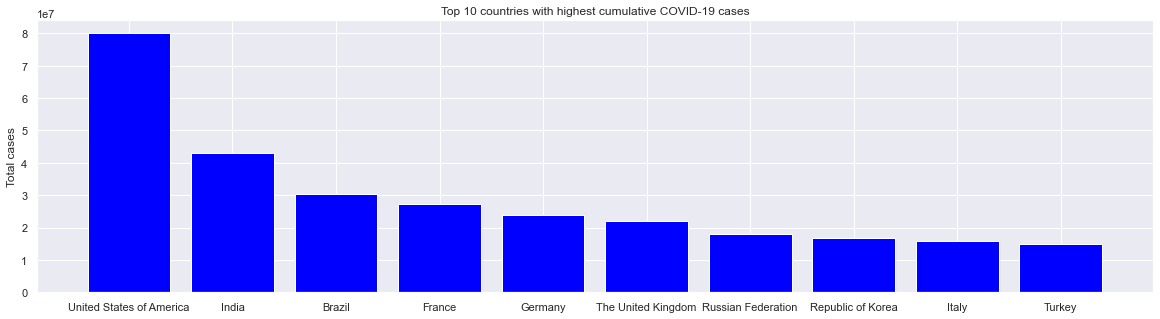

In [84]:
plt.figure(figsize=(20,5))
plt.bar(topcase_10_country.Country, topcase_10_country.Cumulative_cases, color='blue')
plt.ylabel('Total cases')
plt.title('Top 10 countries with highest cumulative COVID-19 cases')

Text(0.5, 1.0, 'Death rate of COVID-19 in 10 countries with highest cumulative cases')

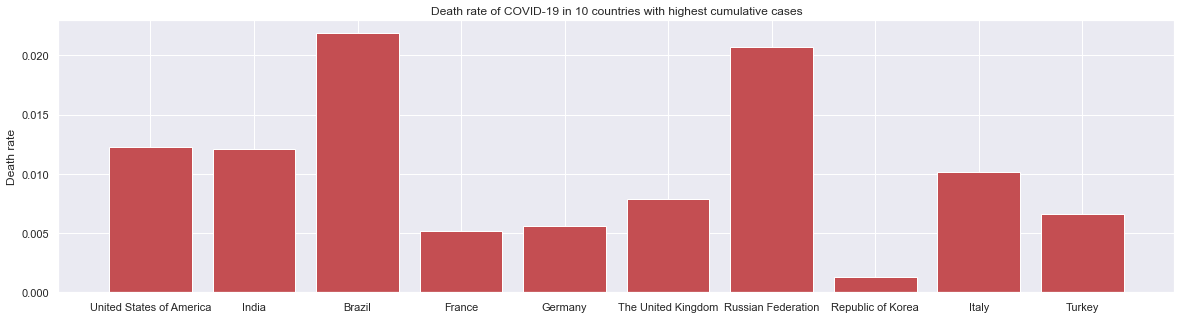

In [85]:
plt.figure(figsize=(20,5))
plt.bar(topcase_10_country.Country, topcase_10_country.Death_rate, color='r')
plt.ylabel('Death rate')
plt.title('Death rate of COVID-19 in 10 countries with highest cumulative cases')

In [86]:
topdeathrate_10_country = sorted_by_country.nlargest(n=10, columns=['Death_rate'])
topdeathrate_10_country.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate
197634,2022-04-22,YE,Yemen,EMRO,0,11818,0,2148,0.181757
172404,2022-04-22,SD,Sudan,EMRO,9,62093,1,4930,0.079397
138764,2022-04-22,PE,Peru,AMRO,730,3557869,28,212704,0.059784
113534,2022-04-22,MX,Mexico,AMRO,0,5730560,0,324004,0.056540
175768,2022-04-22,SY,Syrian Arab Republic,EMRO,0,55785,0,3150,0.056467
168199,2022-04-22,SO,Somalia,EMRO,0,26485,0,1361,0.051388
52141,2022-04-22,EG,Egypt,EMRO,0,515645,0,24613,0.047732
840,2022-04-22,AF,Afghanistan,EMRO,56,178611,0,7680,0.042998
22706,2022-04-22,BA,Bosnia and Herzegovina,EURO,57,376699,3,15756,0.041826
51300,2022-04-22,EC,Ecuador,AMRO,0,867170,0,35543,0.040987


Text(0.5, 1.0, '10 countries with highest death rate of COVID-19')

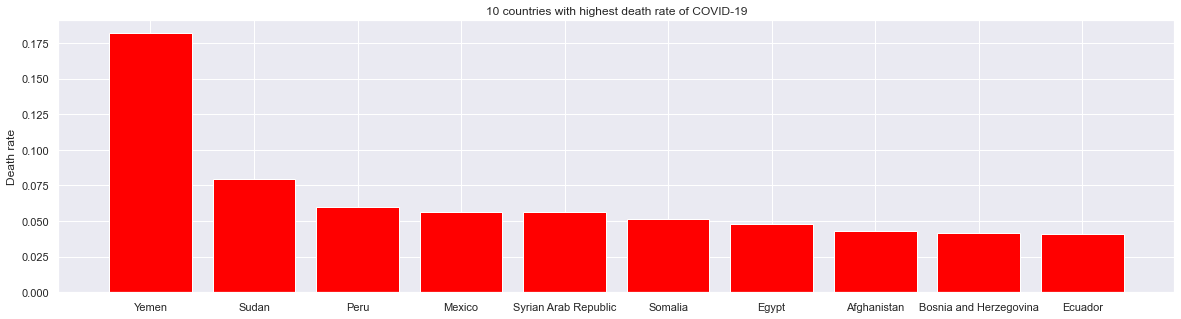

In [87]:
plt.figure(figsize=(20,5))
plt.bar(topdeathrate_10_country.Country, topdeathrate_10_country.Death_rate, color='red')
plt.ylabel('Death rate')
plt.title('10 countries with highest death rate of COVID-19')

### Analysis of GDP 

We use two datasets with more data points for analysis. The first set is top 20 countries with highest death rates. The second set is top 20 countries with most cumulative cases. We get those countries' latest GDP per capita from the World Bank (2020) and add them as a new column of the dataset. The GDP data can be found at https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?most_recent_year_desc=true.

#### GDP analysis among top 20 countries with highest death rate

In [88]:
topdeathrate_20_country = by_country.nlargest(n=20, columns=['Death_rate'])

In [89]:
topdeathrate_20_country.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate
197634,2022-04-22,YE,Yemen,EMRO,0,11818,0,2148,0.181757
172404,2022-04-22,SD,Sudan,EMRO,9,62093,1,4930,0.079397
138764,2022-04-22,PE,Peru,AMRO,730,3557869,28,212704,0.059784
113534,2022-04-22,MX,Mexico,AMRO,0,5730560,0,324004,0.056540
175768,2022-04-22,SY,Syrian Arab Republic,EMRO,0,55785,0,3150,0.056467
168199,2022-04-22,SO,Somalia,EMRO,0,26485,0,1361,0.051388
52141,2022-04-22,EG,Egypt,EMRO,0,515645,0,24613,0.047732
840,2022-04-22,AF,Afghanistan,EMRO,56,178611,0,7680,0.042998
22706,2022-04-22,BA,Bosnia and Herzegovina,EURO,57,376699,3,15756,0.041826
51300,2022-04-22,EC,Ecuador,AMRO,0,867170,0,35543,0.040987


In [90]:
gdp = [758.15, 486.42,6126.87,8329.27,1334.37,438.26,3569.21,516.75,6079.74,5600.39,632.94,567.67,10079.2,1467.6,636.82,773.0,5917.26,5001.07,3521.59,1272.37]
#check before append
len(gdp)

20

In [91]:
topdeathrate_20_country['GDP_per_capita']=gdp
topdeathrate_20_country.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate,GDP_per_capita
197634,2022-04-22,YE,Yemen,EMRO,0,11818,0,2148,0.181757,758.15
172404,2022-04-22,SD,Sudan,EMRO,9,62093,1,4930,0.079397,486.42
138764,2022-04-22,PE,Peru,AMRO,730,3557869,28,212704,0.059784,6126.87
113534,2022-04-22,MX,Mexico,AMRO,0,5730560,0,324004,0.056540,8329.27
175768,2022-04-22,SY,Syrian Arab Republic,EMRO,0,55785,0,3150,0.056467,1334.37
168199,2022-04-22,SO,Somalia,EMRO,0,26485,0,1361,0.051388,438.26
52141,2022-04-22,EG,Egypt,EMRO,0,515645,0,24613,0.047732,3569.21
840,2022-04-22,AF,Afghanistan,EMRO,56,178611,0,7680,0.042998,516.75
22706,2022-04-22,BA,Bosnia and Herzegovina,EURO,57,376699,3,15756,0.041826,6079.74
51300,2022-04-22,EC,Ecuador,AMRO,0,867170,0,35543,0.040987,5600.39


In [92]:
topdeathrate_20_country['GDP_per_capita'].corr(topdeathrate_20_country['Death_rate'])

-0.18852748622354423

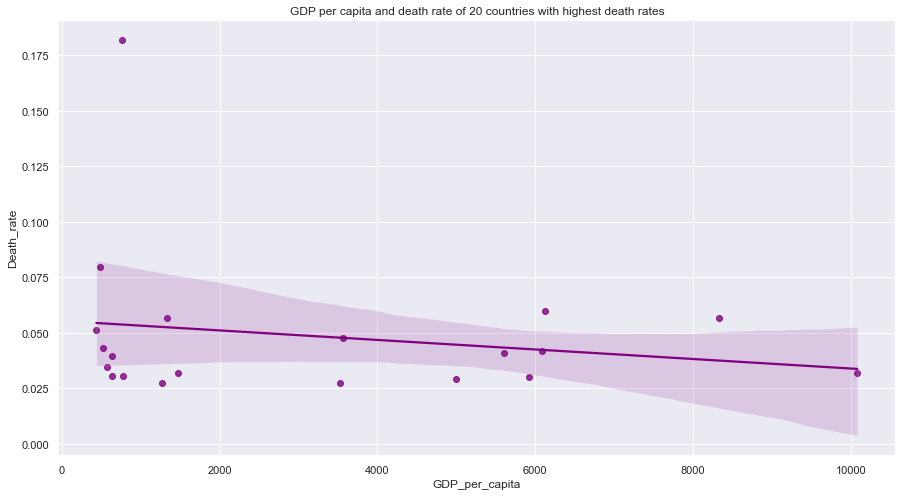

In [93]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x = topdeathrate_20_country['GDP_per_capita'], y=topdeathrate_20_country['Death_rate'], color='purple').set( title='GDP per capita and death rate of 20 countries with highest death rates');

#### GDP analysis among top 20 countries with most cumulative cases

In [94]:
topcase_20_country = by_country.nlargest(n=20, columns=['Cumulative_cases'])
topcase_20_country.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate
190906,2022-04-22,US,United States of America,AMRO,0,80006661,0,982322,0.012278
81576,2022-04-22,IN,India,SEARO,2451,43052425,54,522116,0.012127
24388,2022-04-22,BR,Brazil,AMRO,36750,30311969,263,662414,0.021853
61392,2022-04-22,FR,France,EURO,89190,27272068,174,141568,0.005191
66438,2022-04-22,DE,Germany,EURO,108133,24006254,12,133921,0.005579
178291,2022-04-22,GB,The United Kingdom,EURO,11408,21909513,43,173032,0.007898
148015,2022-04-22,RU,Russian Federation,EURO,9001,18119862,195,374563,0.020671
144651,2022-04-22,KR,Republic of Korea,WPRO,81058,16755055,206,21873,0.001305
87463,2022-04-22,IT,Italy,EURO,75995,15934437,166,162264,0.010183
184178,2022-04-22,TR,Turkey,EURO,3354,15010718,17,98645,0.006572


In [95]:
topcases_gdp = [63593.44,1927.71,6796.84,41059.17,39030.36,10126.72,8536.43,46208.43,31714.22,27063.19,8579.02,2422.48,5334.56, 8329.27,15720.99,3869.59,3724.94,52397.12,5655.87,6126.87]
#check data before appending them to the dataframe
len(topcases_gdp)

20

In [96]:
topcase_20_country['GDP_per_capita']= topcases_gdp

In [97]:
topcase_20_country['Death_rate'] = topcase_20_country['Cumulative_deaths']/topcase_20_country['Cumulative_cases']
topcase_20_country.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate,GDP_per_capita
190906,2022-04-22,US,United States of America,AMRO,0,80006661,0,982322,0.012278,63593.44
81576,2022-04-22,IN,India,SEARO,2451,43052425,54,522116,0.012127,1927.71
24388,2022-04-22,BR,Brazil,AMRO,36750,30311969,263,662414,0.021853,6796.84
61392,2022-04-22,FR,France,EURO,89190,27272068,174,141568,0.005191,41059.17
66438,2022-04-22,DE,Germany,EURO,108133,24006254,12,133921,0.005579,39030.36
178291,2022-04-22,GB,The United Kingdom,EURO,11408,21909513,43,173032,0.007898,10126.72
148015,2022-04-22,RU,Russian Federation,EURO,9001,18119862,195,374563,0.020671,8536.43
144651,2022-04-22,KR,Republic of Korea,WPRO,81058,16755055,206,21873,0.001305,46208.43
87463,2022-04-22,IT,Italy,EURO,75995,15934437,166,162264,0.010183,31714.22
184178,2022-04-22,TR,Turkey,EURO,3354,15010718,17,98645,0.006572,27063.19


Then, we examine whether there is a correlationship between GPD and death rate.

In [98]:
topcase_20_country['GDP_per_capita'].corr(topcase_20_country['Death_rate'])

-0.22872047075204124

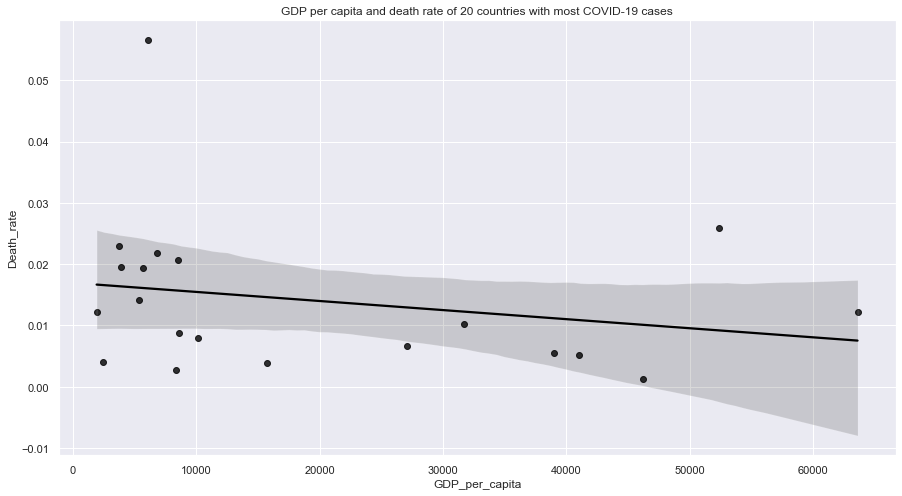

In [99]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x = topcase_20_country['GDP_per_capita'], y=topcase_20_country['Death_rate'], color='black').set( title='GDP per capita and death rate of 20 countries with most COVID-19 cases');

In the first dataset, the correlation coefficient is -0.18852748622354423. For the second dataset, the correlation coefficient is -0.22872047075204124. Acoording to a rough guideline of coefficient, there is weak(no) association betwwen the GDP per capita and death rate. (url:https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html#:~:text=Possible%20values%20of%20the%20correlation,little%2C%20if%20any%2C%20correlation.)
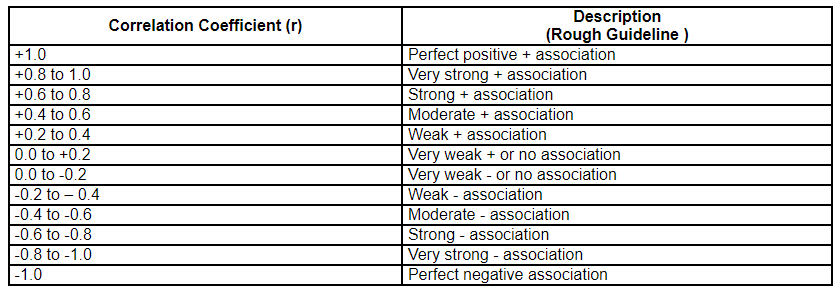

### Analysis of vaccination 

Vaccination is an important factor that can affect the death rate. We choose two countries for a detailed comparsion analysis. United States has the most cumulative cases while Yemen has the highest death rate.

In [100]:
df1=pd.read_csv("daily-covid-19-vaccination-doses.csv",parse_dates=['Day'])

#### Analysis of vaccination, daily cases, and death rates in Yemen and US

Text(0.5, 0, 'Date_reported')

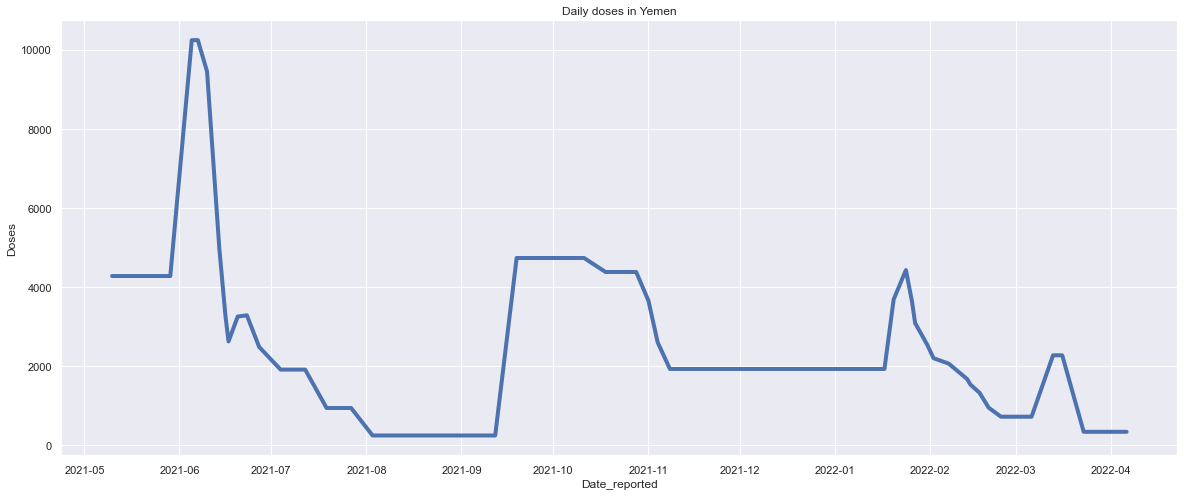

In [101]:
df_yemen=df1[df1['Entity']=='Yemen']
y=df_yemen['new_vaccinations_smoothed']
x=df_yemen['Day']
plt.figure(figsize=(20,8))
plt.plot(x,y,linewidth = 4)
plt.title('Daily doses in Yemen')
plt.ylabel('Doses')
plt.xlabel('Date_reported')

Yemen has about 30 million population, while vaccination rate only reaches 1.4%.

Text(0.5, 0, 'Date_reported')

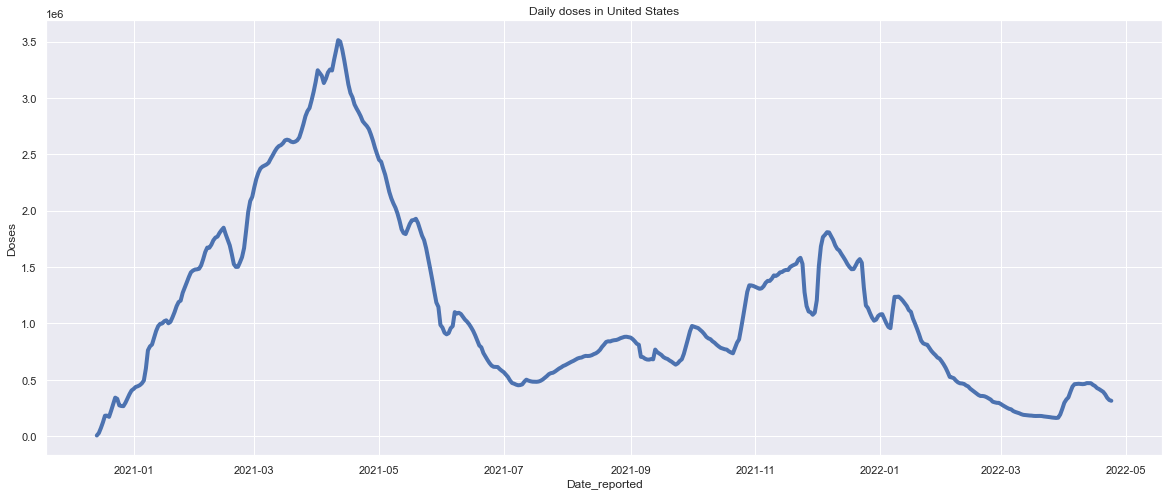

In [102]:
df_US=df1[df1['Entity']=='United States']
y=df_US['new_vaccinations_smoothed']
x=df_US['Day']
plt.figure(figsize=(20,8))
plt.plot(x,y,linewidth = 4)
plt.title('Daily doses in United States')
plt.ylabel('Doses')
plt.xlabel('Date_reported')

Compared to Yemen, United Stateds has over 330 million people while vaccination rate reached 66% because America has most cases and relatively high vaccinate rate，we deem it a ideal comparisons

Text(0.5, 0, 'Date_reported')

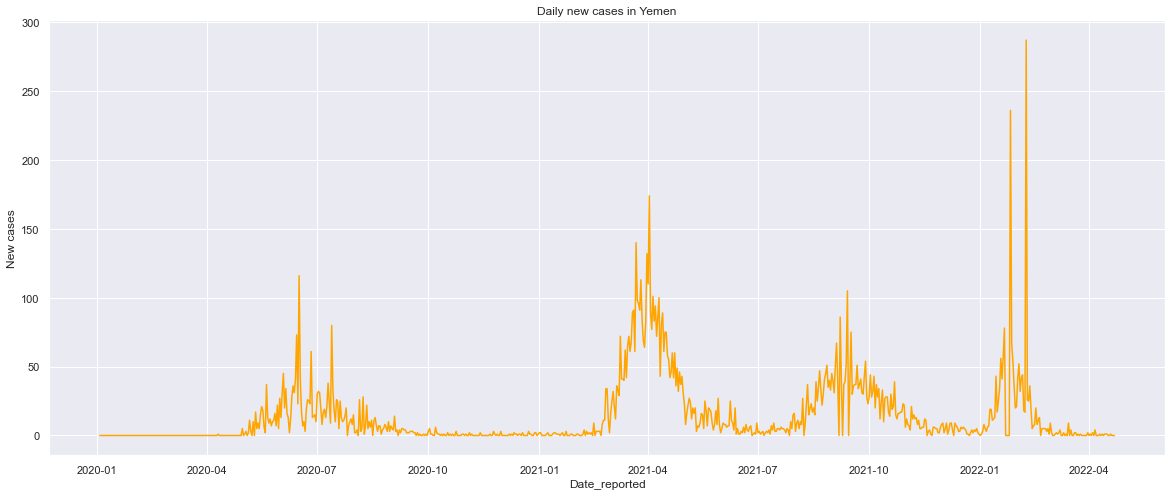

In [103]:
df_Yemen_WHO=df[df['Country']=='Yemen']
y=df_Yemen_WHO['New_cases']
x=df_Yemen_WHO['Date_reported']
plt.figure(figsize=(20,8))
plt.plot(x,y,color='orange')
plt.title('Daily new cases in Yemen')
plt.ylabel('New cases')
plt.xlabel('Date_reported')

Text(0.5, 0, 'Date_reported')

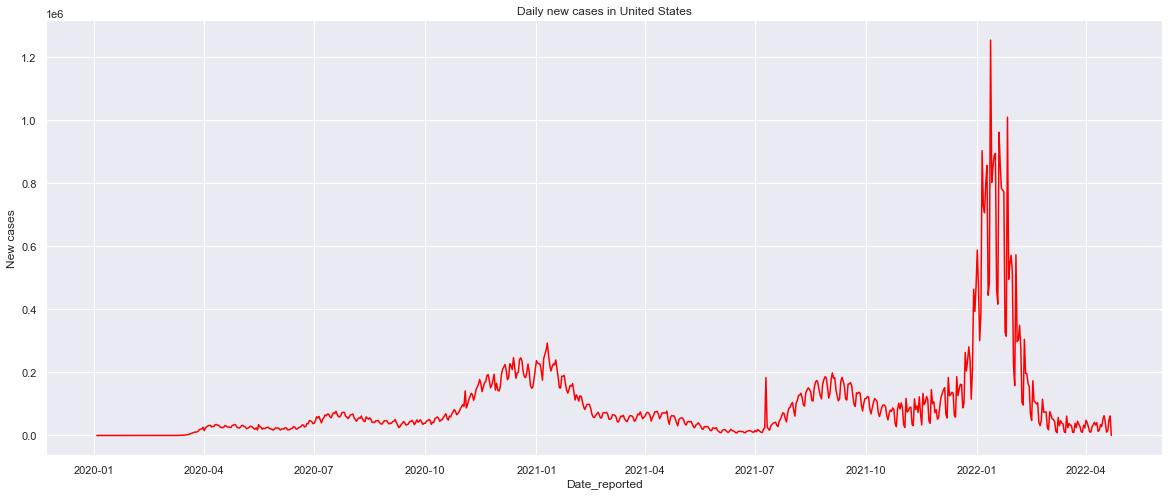

In [104]:
df_US_WHO=df[df['Country']=='United States of America']
y=df_US_WHO['New_cases']
x=df_US_WHO['Date_reported']
plt.figure(figsize=(20,8))
plt.plot(x,y,color='red')
plt.title('Daily new cases in United States')
plt.ylabel('New cases')
plt.xlabel('Date_reported')

both Yemen and US new cases have 3-4 crests,at that time number of infected persons boosted. With higher vaccination rate and about 10 times population of Yemen, we expect America's new cases of Covid-19 to be lower than 10 times of Yemen. In fact, US new cases are far more than we expected, which shows that vaccnitaion rate is not that significantly correlated with infection rate.

Text(0.5, 0, 'Date_reported')

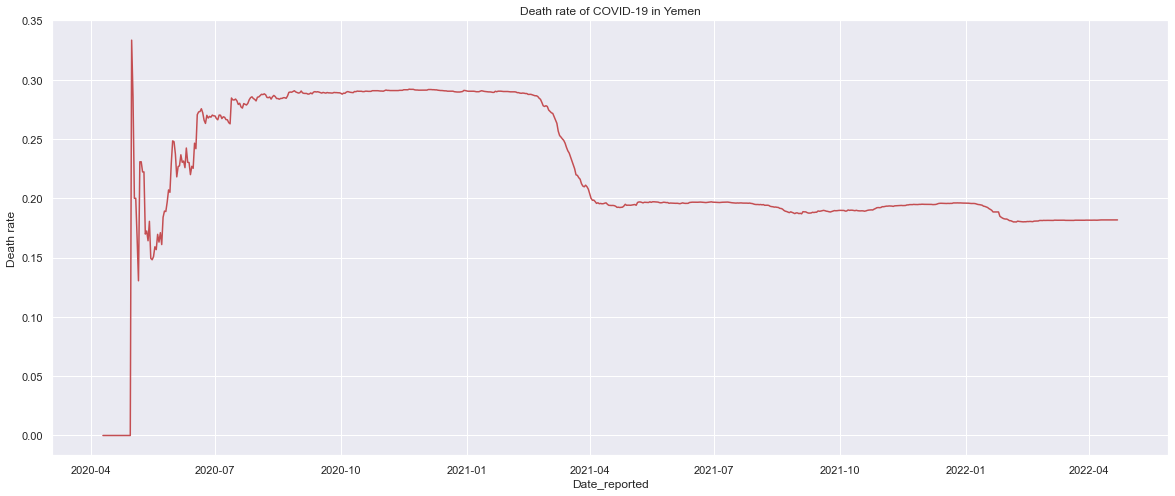

In [105]:

y=df_Yemen_WHO['Cumulative_deaths']/df_Yemen_WHO['Cumulative_cases']
x=df_Yemen_WHO['Date_reported']
plt.figure(figsize=(20,8))
plt.plot(x,y,color='r')
plt.title('Death rate of COVID-19 in Yemen')
plt.ylabel('Death rate')
plt.xlabel('Date_reported')

Text(0.5, 0, 'Date_reported')

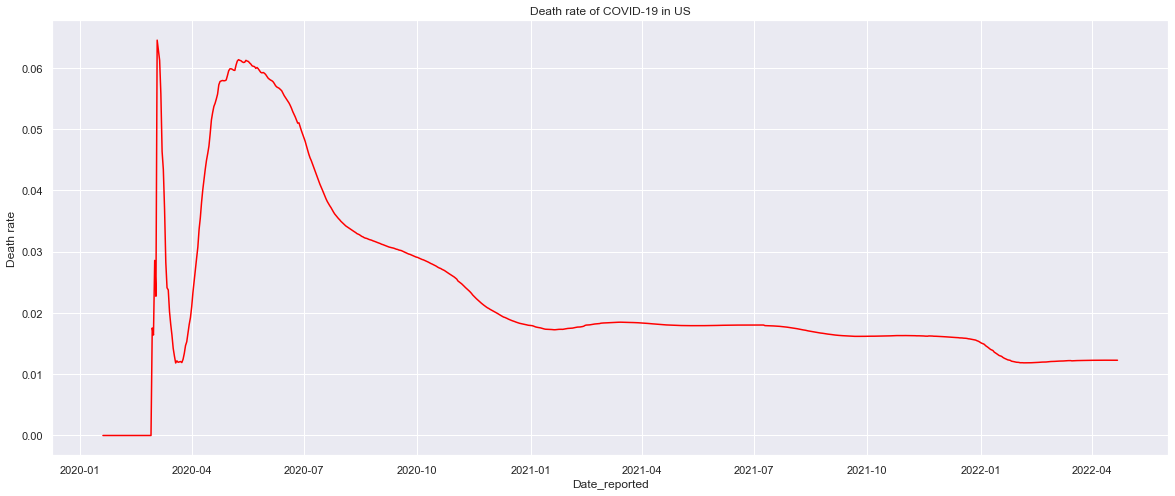

In [106]:
y=df_US_WHO['Cumulative_deaths']/df_US_WHO['Cumulative_cases']
x=df_US_WHO['Date_reported']
plt.figure(figsize=(20,8))
plt.plot(x,y,color='red')
plt.title('Death rate of COVID-19 in US')
plt.ylabel('Death rate')
plt.xlabel('Date_reported')

US starts vaccination from 2021-1
Yemen starts vaccination from 2021-4
we can look over this plot, there are obviously decending on that time point.

#### Vaccination analysis among top 20 countries with highest death rate

In [107]:
topdeath_fully_vaccinated_per_100 = [1.38, 4.941, 80.286, 61.973,70.934,8.703,32.679,11.825,25.789,78.456,24.884,6.393,29.55,40.873,4.505,13.165,40.269,47.023,53.754,1.072]

In [108]:
len(topdeath_fully_vaccinated_per_100)

20

In [109]:
topdeathrate_20_country['Vac_per_100'] = topdeath_fully_vaccinated_per_100

In [110]:
topdeathrate_20_country.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate,GDP_per_capita,Vac_per_100
197634,2022-04-22,YE,Yemen,EMRO,0,11818,0,2148,0.181757,758.15,1.380
172404,2022-04-22,SD,Sudan,EMRO,9,62093,1,4930,0.079397,486.42,4.941
138764,2022-04-22,PE,Peru,AMRO,730,3557869,28,212704,0.059784,6126.87,80.286
113534,2022-04-22,MX,Mexico,AMRO,0,5730560,0,324004,0.056540,8329.27,61.973
175768,2022-04-22,SY,Syrian Arab Republic,EMRO,0,55785,0,3150,0.056467,1334.37,70.934
168199,2022-04-22,SO,Somalia,EMRO,0,26485,0,1361,0.051388,438.26,8.703
52141,2022-04-22,EG,Egypt,EMRO,0,515645,0,24613,0.047732,3569.21,32.679
840,2022-04-22,AF,Afghanistan,EMRO,56,178611,0,7680,0.042998,516.75,11.825
22706,2022-04-22,BA,Bosnia and Herzegovina,EURO,57,376699,3,15756,0.041826,6079.74,25.789
51300,2022-04-22,EC,Ecuador,AMRO,0,867170,0,35543,0.040987,5600.39,78.456


In [111]:
topdeathrate_20_country['Vac_per_100'].corr(topdeathrate_20_country['Death_rate'])


-0.18670510241754495

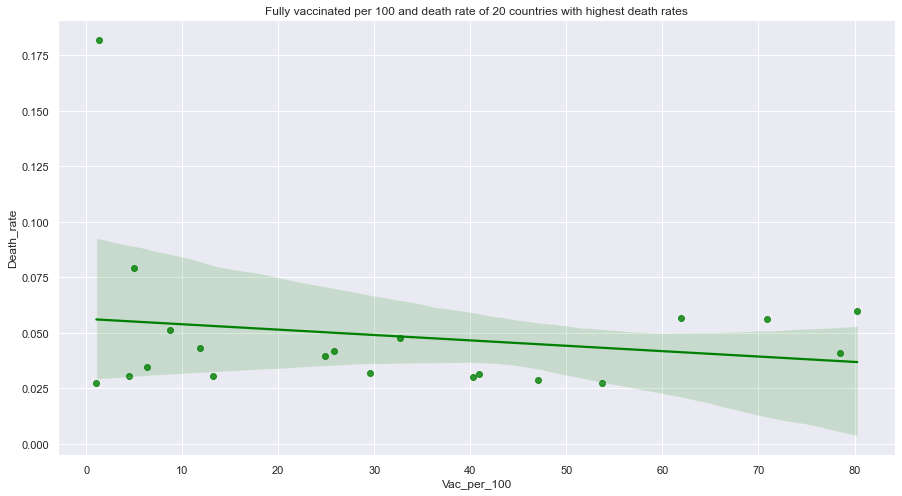

In [112]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x = topdeathrate_20_country['Vac_per_100'], y=topdeathrate_20_country['Death_rate'], color='green').set( title='Fully vaccinated per 100 and death rate of 20 countries with highest death rates');

#### Vaccination analysis among top 20 countries with most cumulative cases

In [113]:
fully_vaccinated_per_100 = [64.478,60.96,74.193,80.182,76.04,72.813,50.03,86.643,79.472,63.736,78.645,78.974,82.134,71.225,79.726,68.003,68.986,59.143,59.041,61.973]

In [114]:
len(fully_vaccinated_per_100)

20

In [115]:
topcase_20_country['Vac_per_100'] = fully_vaccinated_per_100

In [116]:
topcase_20_country.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_rate,GDP_per_capita,Vac_per_100
190906,2022-04-22,US,United States of America,AMRO,0,80006661,0,982322,0.012278,63593.44,64.478
81576,2022-04-22,IN,India,SEARO,2451,43052425,54,522116,0.012127,1927.71,60.960
24388,2022-04-22,BR,Brazil,AMRO,36750,30311969,263,662414,0.021853,6796.84,74.193
61392,2022-04-22,FR,France,EURO,89190,27272068,174,141568,0.005191,41059.17,80.182
66438,2022-04-22,DE,Germany,EURO,108133,24006254,12,133921,0.005579,39030.36,76.040
178291,2022-04-22,GB,The United Kingdom,EURO,11408,21909513,43,173032,0.007898,10126.72,72.813
148015,2022-04-22,RU,Russian Federation,EURO,9001,18119862,195,374563,0.020671,8536.43,50.030
144651,2022-04-22,KR,Republic of Korea,WPRO,81058,16755055,206,21873,0.001305,46208.43,86.643
87463,2022-04-22,IT,Italy,EURO,75995,15934437,166,162264,0.010183,31714.22,79.472
184178,2022-04-22,TR,Turkey,EURO,3354,15010718,17,98645,0.006572,27063.19,63.736


In [117]:
topcase_20_country['Vac_per_100'].corr(topcase_20_country['Death_rate'])


-0.5338935471887658

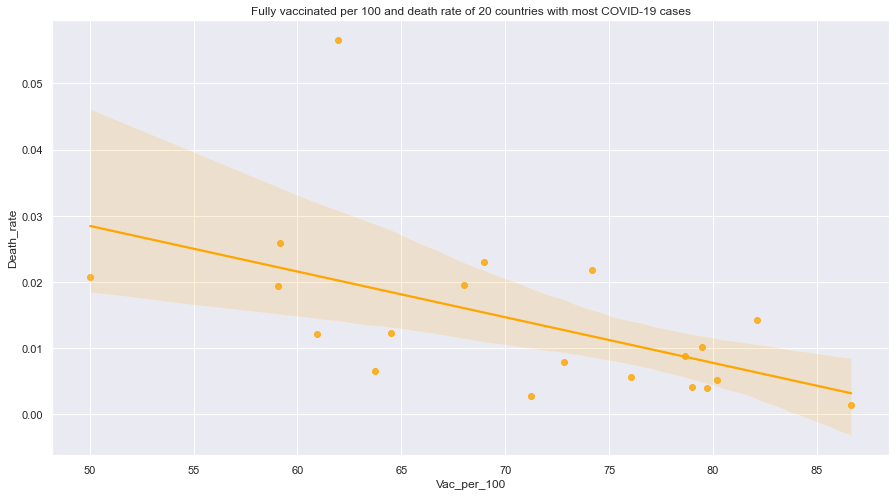

In [118]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x = topcase_20_country['Vac_per_100'], y=topcase_20_country['Death_rate'], color='orange').set( title='Fully vaccinated per 100 and death rate of 20 countries with most COVID-19 cases');

# Conclusion

## Findings


It is found that GDP has little impact on the death rate of COVID-19. Vaccination rate also didn't influence the daily new case of COVID-19. But vaccination does have impacts on death rate. It has greater impact on countries with large numbers of cases than those with high death rate.
This finding needs further validation by analysis using more datapoints.

## Limitations

First,we didn't take vaccination type into consideration. Also, Death rate of COVID-19 variants differs, which is also wrothy noting. Omicron and delta are not the same COVID-19.Second, some countries may not have accurate statistics, so we can hardly rely on them.Third, we conducted GDP and vaccination analysis among countries with a sample size of 20, which is still relatively small. 

## Future recommendations


We recommend to take other factors into consideration, such as population structure and medical systems. Also we can
explore the effectiveness among more groups. Such as between people who are vaccinated and who are not, or between who are fully vaccinated and partly vaccinated.
For the vaccination, we can try to analyze the types of vaccines a country use, the time when a country begins vaccination, and keep tracking the death rate of vaccinated people.For the GDP, we still need long-term data and larger sample sizes for examination. Some countries may have limited capacity to track the new cases and the consequences.

# References

https://covid19.who.int/data
https://ourworldindata.org/covid-vaccinations?country=OWID_WRL
https://www.familiesfightingflu.org/flu-deaths-vs-covid-19-deaths/
https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html#:~:text=Possible%20values%20of%20the%20correlation,little%2C%20if%20any%2C%20correlation
https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?most_recent_year_desc=true
